# 데이터마이닝 1주차 실습

### 실습 환경 : Python, Jupyter notebook
- Anaconda 설치방법 link: https://greeksharifa.github.io/references/2019/02/01/Miniconda-usage/
- jupyter notebook 설치방법 link: https://greeksharifa.github.io/references/2019/01/26/Jupyter-usage/

In [9]:
import sys

print("--Python.version—")
print(sys.version)

--Python.version—
3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


# Linear Regression  
- 설명 변수($X_1,X_2,...,X_n$) : 예측에 사용하고자 하는 변수
- 목표 변수($y$) : 예측하고자 하는 변수

회귀 분석은 $x$에 대응하는 $y$와 가장 비슷한 값 $\hat y$을 출력하는 함수 $f(x)$를 찾는 것  
- $ \hat y = f(x) \approx y $
- $ \mathbf {\hat Y} = \mathbf {\hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 + ... + \hat \beta_p x_p } $

## 1. Simple Linear Regression
> 설명 변수 1개로 $y$의 값을 예측
- $ \mathbf{\hat Y = \hat \beta_0 + \hat \beta_1x_1}$

### 1.1 Import packages

In [10]:
# python으로 데이터를 다룰 때 많이 쓰이는 패키지
# !pip install 'package name'
# !pip install pandas
import numpy as np
import pandas as pd
# 시각화 package
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 make regression sample
+ $y=2x -5 + \epsilon$

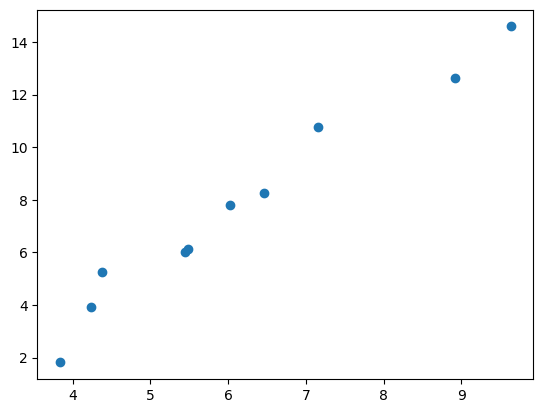

In [11]:
rng = np.random.RandomState(0) # random number generator 0~1
n = 10
x = 10 * rng.rand(n)
y = 2 * x - 5 + rng.randn(n)
plt.scatter(x, y);

### 1.3 OLS : 최소 제곱법
+ $\mathbf{y = X\beta}$
+ $\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_{10}
\end{bmatrix} = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots \\
1 & x_{10}
\end{bmatrix}  \begin{bmatrix}
b_0 \\
b_1
\end{bmatrix}$

In [12]:
x

array([5.48813504, 7.15189366, 6.02763376, 5.44883183, 4.23654799,
       6.45894113, 4.37587211, 8.91773001, 9.63662761, 3.83441519])

In [13]:
X = np.c_[np.ones(n), x] # np.ones(shape, dtype, order): 1만 있는 array 생성
X

array([[1.        , 5.48813504],
       [1.        , 7.15189366],
       [1.        , 6.02763376],
       [1.        , 5.44883183],
       [1.        , 4.23654799],
       [1.        , 6.45894113],
       [1.        , 4.37587211],
       [1.        , 8.91773001],
       [1.        , 9.63662761],
       [1.        , 3.83441519]])

+ Parameter 추정
    + $\mathbf{\hat \beta=(X^T X)^{-1}X^Ty}$

In [14]:
# np.linalg.inv : 역행렬, @ : 행렬곱
beta = np.linalg.inv(X.T @ X) @ X.T @ y # coefficeint
beta

array([-4.64587357,  2.00755475])

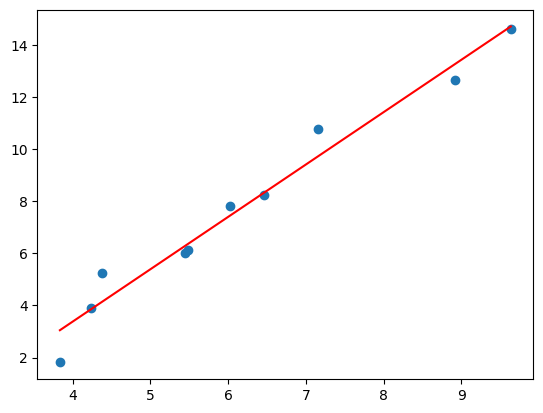

In [15]:
# 회귀선 그리기
x_new = np.linspace(np.min(x), np.max(x), n) # numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None): 자동완성 함수
y_pred = np.c_[np.ones(n), x_new] @ beta
plt.scatter(x, y)
plt.plot(x_new, y_pred, 'r-')
plt.show()

## 2. Multiple Linear Regression
+ $\mathbf {\hat Y} = \mathbf{\hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 + ... + \hat \beta_p x_p}$
+ 실제 dataset을 이용해 다중 선형 회귀

### 2.1 Dataset
>**※ 인체 치수들로 키를 예측**

        dataset_name: 한국디자인진흥원 7차 인체치수조사(2015)
        data_type: Numeric
        dataset_link: https://sizekorea.kr/page/report/1

In [16]:
# load dataset
body_data = pd.read_csv('body_data.csv',
                        header=None,
                        names = ['Gender', 'Age', 'Weight', 'Belly', 'Height'])
body_data

,Gender,Age,Weight,Belly,Height
0,남,20,68.0,74.1,175.1
1,남,20,66.0,78.0,176.9
2,남,19,69.0,75.5,174.4
3,남,20,81.0,84.5,173.6
4,남,20,81.0,88.8,175.1
...,...,...,...,...,...
6415,여,29,55.0,84.2,161.8
6416,여,29,56.0,86.0,160.6
6417,여,44,50.0,83.1,150.8
6418,여,29,55.0,83.1,160.6


### 2.2 Data Handling

In [17]:
# 성별 변수 값들의 이름 변경
body_data['Gender'] = body_data['Gender'].replace('남', 'male')
body_data['Gender'] = body_data['Gender'].replace('여', 'female')
body_data.head()

,Gender,Age,Weight,Belly,Height
0,male,20,68.0,74.1,175.1
1,male,20,66.0,78.0,176.9
2,male,19,69.0,75.5,174.4
3,male,20,81.0,84.5,173.6
4,male,20,81.0,88.8,175.1


In [18]:
# 수치형 변수 요약 통계량
body_data.describe()

,Age,Weight,Belly,Height
count,6420.000000,6413.000000,6415.000000,6419.000000
mean,31.366667,63.902386,84.327155,165.446534
std,14.385176,12.566001,8.849499,8.940022
min,15.000000,37.000000,61.500000,135.400000
25%,19.000000,55.000000,78.000000,158.500000
50%,27.000000,62.000000,83.700000,165.300000
75%,40.000000,72.000000,90.000000,172.300000
max,69.000000,139.000000,131.000000,191.500000


#### Handling missing data

In [19]:
# 결측치 개수
body_data.isnull().sum()

Gender    0
Age       0
Weight    7
Belly     5
Height    1
dtype: int64

In [20]:
# axis: 제거할 축 0(row) or 1(column), inplace: 즉시 적용할 지 여부
body_data.dropna(axis=0, inplace=True)

In [21]:
body_data.isnull().sum()

Gender    0
Age       0
Weight    0
Belly     0
Height    0
dtype: int64

In [22]:
print('결측치 데이터 제거 후 데이터 수: {}개'.format(body_data.shape[0]))

결측치 데이터 제거 후 데이터 수: 6410개


In [23]:
# 중복된 instance 제거
body_data.drop_duplicates(inplace=True)
print('중복 데이터 제거 후 데이터 수: {}개'.format(body_data.shape[0]))

중복 데이터 제거 후 데이터 수: 6403개


In [24]:
# 남자 구분 후 나이별 오름차순 정렬
df_male = body_data[body_data['Gender'] == 'male'].copy()
df_male.sort_values(by=['Age'], axis=0, ascending=True)

,Gender,Age,Weight,Belly,Height
68,male,15,63.0,79.0,174.9
60,male,15,66.0,76.5,171.4
98,male,15,58.0,72.8,169.7
65,male,15,56.0,75.5,161.4
2305,male,16,60.0,71.8,175.8
...,...,...,...,...,...
236,male,69,63.0,87.0,158.5
2148,male,69,66.0,91.3,167.2
391,male,69,57.0,84.0,165.4
287,male,69,90.0,108.2,172.7


In [25]:
# 여자 구분 후 나이별 내림차순 정렬
df_female = body_data[body_data['Gender'] == 'female'].copy()
df_female.sort_values(by=['Age'], axis=0, ascending=False)

,Gender,Age,Weight,Belly,Height
3595,female,69,48.0,82.3,149.2
6198,female,69,60.0,98.8,154.9
5119,female,69,50.0,88.2,141.6
5286,female,69,49.0,88.3,150.3
3732,female,69,49.0,84.6,145.1
...,...,...,...,...,...
6029,female,16,57.0,82.0,165.5
3758,female,16,56.0,75.0,164.0
3224,female,15,46.0,75.0,159.4
3238,female,15,48.0,76.5,158.1


### 2.3 EDA(Exploratory Data Analysis)
데이터를 탐색적으로 분석

In [26]:
# 시각화 package
import matplotlib.pyplot as plt
import seaborn as sns

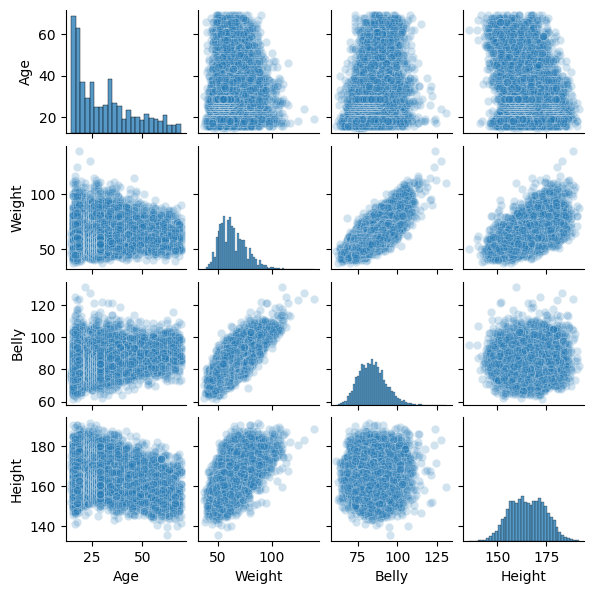

In [27]:
# 변수 별로 짝지어 plot
sns.pairplot(body_data, kind='scatter', plot_kws=dict(alpha=0.2), height=1.5)

In [28]:
# 상관계수 -1 ~ 1  두 변수가 1에 가까울 수록 양의 관계, 0에 가까울 수록 독립적임
body_data.corr()

<ipython-input-28-9cdd5c4d4174>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  body_data.corr()


,Age,Weight,Belly,Height
Age,1.000000,0.064693,0.400540,-0.299811
Weight,0.064693,1.000000,0.715668,0.611747
Belly,0.400540,0.715668,1.000000,0.033561
Height,-0.299811,0.611747,0.033561,1.000000


<ipython-input-29-fe208086c55e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(body_data.corr(), annot = True)


<Axes: >

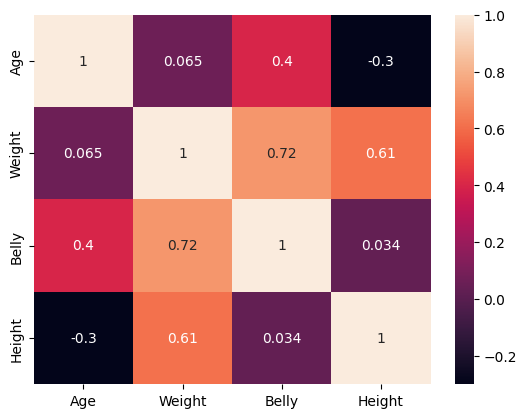

In [29]:
# 변수 별 상관관계를 heatmap으로 시각화
sns.heatmap(body_data.corr(), annot = True)

#### 남, 여 분리 후 복부 둘레와 키의 관계

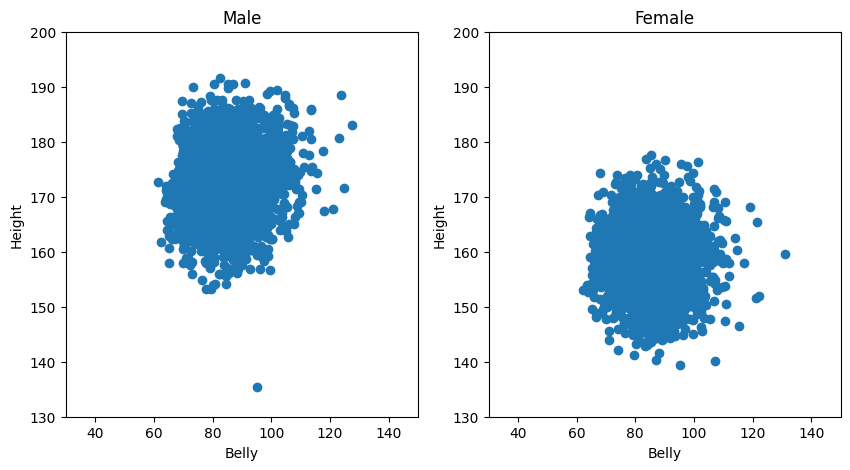

In [30]:
# figsize: 그래프 가로, 세로 인치단위 크기 설정
fig = plt.figure(figsize=(10,5))

# 1행, 2열 중 첫번째 plot
ax1 = fig.add_subplot(1, 2, 1)
# 1행, 2열 중 두번째 plot
ax2 = fig.add_subplot(1, 2, 2)

# scatter plot # 남
ax1.scatter(df_male['Belly'], df_male['Height'])
# scatter plot # 여
ax2.scatter(df_female['Belly'], df_female['Height'])

# scaling
ax1.set(xlim=[30, 150], ylim=[130, 200], title='Male', xlabel='Belly', ylabel='Height')
ax2.set(xlim=[30, 150], ylim=[130, 200], title='Female', xlabel='Belly', ylabel='Height')

plt.show()

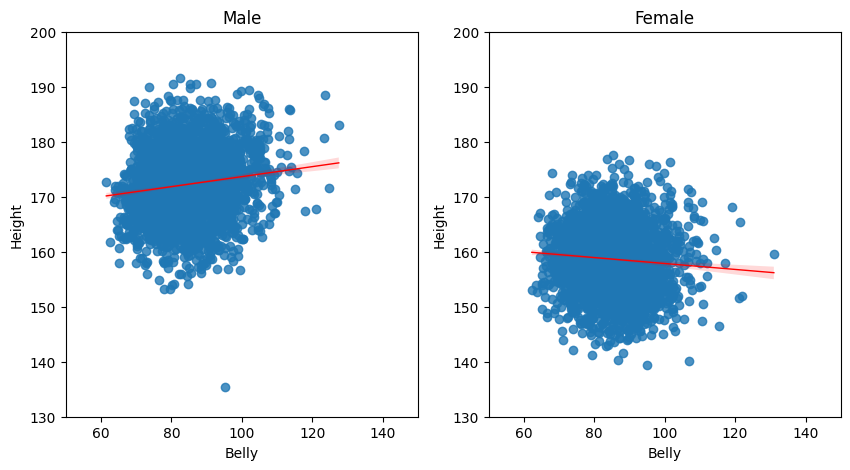

In [31]:
# subplot 생성 #
f, axes = plt.subplots(1, 2, figsize=(10,5))

# regplot : 회귀선을 표시하는 plot
sns.regplot(x='Belly', y='Height', data=df_male, ax=axes[0], label='male', line_kws={'lw': 1, 'color': 'red'})
sns.regplot(x='Belly', y='Height', data=df_female, ax=axes[1], label='female', line_kws={'lw': 1, 'color': 'red'})

# plot scaling
axes[0].set_xlim(50, 150)
axes[0].set_ylim(130, 200)
axes[0].set_title("Male")
axes[1].set_xlim(50, 150)
axes[1].set_ylim(130, 200)
axes[1].set_title("Female")
plt.show()

In [32]:
# 남자의 복부 size와 키 상관관계
df_male[['Belly', 'Height']].corr()

,Belly,Height
Belly,1.000000,0.141232
Height,0.141232,1.000000


In [33]:
# 여자의 복부 size와 키 상관관계
df_female[['Belly', 'Height']].corr()

,Belly,Height
Belly,1.000000,-0.079329
Height,-0.079329,1.000000


### 2.4 Regression Model 생성 및 학습

In [34]:
# sklearn : 머신러닝을 다루는 대표적인 python 패키지
from sklearn.linear_model import LinearRegression
# !pip install sklearn

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

#### 2.4.1 Training Dataset
`Age`, `Weight`, `Belly` 변수를 이용해서 키 `Height`를 예측  
성별 `Gender`는 범주형 변수이므로 수치형 변수로 바꿔줘야함(다음에)

In [35]:
# 변수 선택
X = body_data[['Age', 'Weight', 'Belly']]
y = body_data['Height']
print(X.shape, y.shape)

(6403, 3) (6403,)


In [36]:
# 모델 객체 생성
reg = LinearRegression(fit_intercept=True) # fit_intercept -> beta0 생성 여부 Default=True

# 모델 학습
reg.fit(X, y)

LinearRegression()

#### 2.4.2 파라미터 확인
$y = b_0 + b_1 X_{age} + b_2 X_{weight} + b_3 X_{belly} $

In [37]:
reg.intercept_ # basis b0

179.9065809266219

In [38]:
reg.coef_ # coefficient b1,b2,b3

array([-0.03855566,  0.83724309, -0.79160469])

In [39]:
b0 = reg.intercept_
b1, b2, b3 = reg.coef_
print('회귀식 : y = {} + {}x1 + {}x2 + {}x3'.format(round(b0,3),round(b1,3),round(b2,3),round(b3,3)))

회귀식 : y = 179.907 + -0.039x1 + 0.837x2 + -0.792x3


#### 2.4.3 예측

In [40]:
reg.predict([[25, 70, 80]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([174.22133069])

In [41]:
pred_y = reg.predict(X)
print(pred_y)

[177.41009047 172.648346   177.17764266 ... 154.28993678 159.05448714
 162.3567283 ]


#### 2.4.4 예측 성능(Predictive performance)

+ SS(mean) : Sum of squared mean, 실제 y 값과 평균의 거리의 제곱들의 합
  > $\sum(y - \bar y)^2$, 평균에 대한 y의 변동을 측정하기 위한 것
+ SS(fit): 회귀선과 실제 y 값의 거리의 제곱들의 합(잔차 제곱들의 합)
  > $\sum(data - line)^2$, 회귀식에 대한 y의 변동을 측정하기 위한 것
+ R-squared(결정계수)
> $R^2 = \frac{SS(mean) - SS(fit)}{SS(mean)}$,  회귀식이 얼마나 데이터를 잘 설명할 수 있는가에 대한 척도

#### 성능 확인 (R-squared)

In [42]:
# 비교1) sklearn에 내장된 함수로 구한 R-squared 값 #
print(reg.score(X, y))

0.7120713181227765


In [43]:
# 비교2) 기존 SSR, SST 공식을 사용했을 때
y_bar = np.mean(y.values)

SS_mean = sum((y - y_bar)**2)
SS_fit = sum((y - pred_y)**2)

R_sqr = (SS_mean - SS_fit) /SS_mean
print(R_sqr)

0.7120713181227729


#### 2.4.5 Training, test dataset 분리

In [44]:
ratio = 0.8
num_data = int(len(X)* ratio)

# slicing을 이용하여 train, test set을 나눔 #
train_X, test_X = X[:num_data], X[num_data:]
train_y, test_y = y[:num_data], y[num_data:]

In [45]:
from sklearn.model_selection import train_test_split
# random split training, test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [46]:
reg = LinearRegression(fit_intercept=True) # 모델 객체 생성
reg.fit(X_train, y_train) # 모델 학습

LinearRegression()

In [47]:
# 학습에 사용되지 않은 test dataset을 이용해 성능 검증
print(reg.score(X_test, y_test))

0.7179732077356216


#### 2.4.5 Residual(잔차) Plot
특정 패턴이 나타나면 회귀직선이 적합하지 않다는 의미

In [48]:
# 잔차
y_pred2 = reg.predict(X_test)
residual = y_test - y_pred2

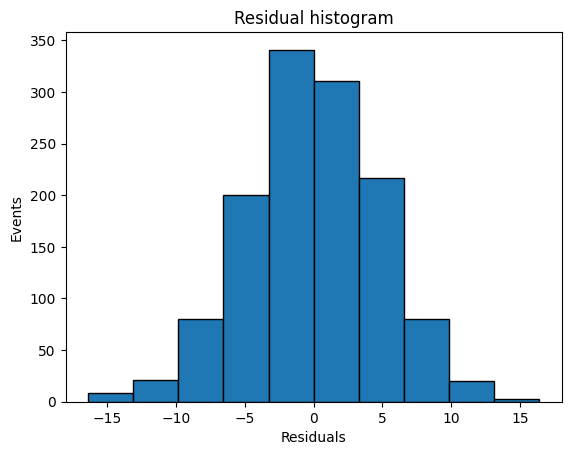

In [49]:
# Residual histogram
plt.hist(residual, bins=10, edgecolor='black')
plt.title("Residual histogram")
plt.xlabel("Residuals")
plt.ylabel("Events")
plt.show() # 특정 패턴이 나타나면 회귀직선이 적합하지 않음

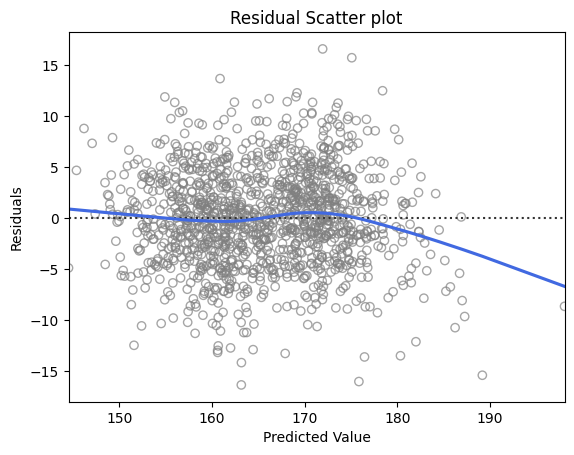

In [50]:
# Residual scatterplot
sns.residplot(x=y_pred2, y=residual,
              scatter_kws={"facecolors":"none", "edgecolors":"grey", 'alpha':0.7},
              line_kws={"color": "royalblue"},
              lowess=True)

plt.title("Residual Scatter plot")
plt.xlabel("Predicted Value")
plt.ylabel("Residuals")
plt.show()

# 에러 시 !pip install statsmodels

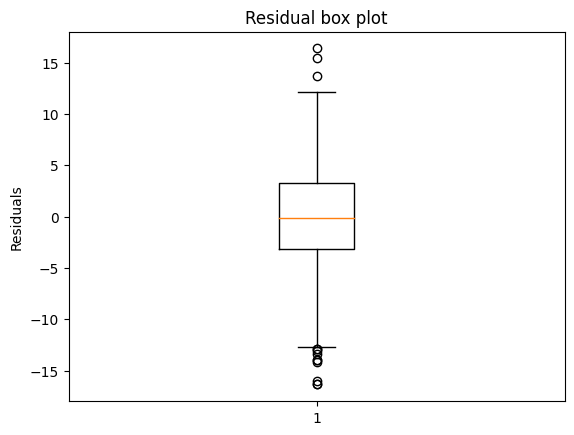

In [51]:
# box plot
plt.boxplot(residual)
plt.title("Residual box plot")
plt.ylabel("Residuals")
plt.show()

@author: Jeongeon Lee, GeunSeong Hwang